# **Waze Project**
**Course 6 - The nuts and bolts of machine learning**

Your team is close to completing their user churn project. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on multiple variables.

Leadership appreciates all your hard work. Now, they want your team to build a machine learning model to predict user churn. To get the best results, your team decides to build and test two tree-based models: random forest and XGBoost.

Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.


# **Course 6 End-of-Course Project: Build Several Machine Learning Models**

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Task 1. Data Import and Overview**


In [747]:
#                        Data manipulation
import numpy as np
import pandas as pd
# Data sets:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
# data preprocessing:
import sklearn.preprocessing as prepro
################################################################################
#                         Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from xgboost import plot_importance


################################################################################
# This lets us see all of the columns, preventing Juptyer from redacting them.
################################################################################
#                         Data modeling


# Models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Grid Search Cross-Validation:
from sklearn.model_selection import GridSearchCV


################################################################################
#                         Model metrics:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, PrecisionRecallDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

################################################################################

# Model export/import:
import pickle
import joblib # more efficient at serializing large numpy arrays

Now read in the dataset as `df0` and inspect the first five rows.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [499]:
# Import dataset
df = pd.read_csv('./data/waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


# **Task 2. Data Cleaning and Filtering**

In [501]:
# Remove ID column given that it is not useful for analysis
df.drop(columns='ID', inplace=True)

In [502]:
# Remove rows with NaN values:
nan_data = False

if nan_data == False:
    print(df.isna().sum())
    df.dropna(axis=0, inplace=True)
    df.reset_index()
    print('\n')
    print(df.isna().sum())

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64


label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64


In [503]:
# Discard rows with values over threshold for selected variables:
mask_data = True
if mask_data == True:
    # Users with at least one drive this month with some km (implies at least one session, theoretically)
    #temp_mask = (df['driven_km_drives'] > 0) & (df['total_sessions'] > 1) & (df['driving_days'] > 0) 
    temp_mask = (df['driven_km_drives'] > 0) & (df['total_sessions'] > 1) 
    df_original_len = len(df) 
    df = df[temp_mask]
    df_len_diff = df_original_len - len(df)
    print ('{} rows weremoved by masking data\n'.format(df_len_diff))

2 rows weremoved by masking data



# **Task 3. Feature Engineering**

In [506]:
pd.DataFrame(df.columns)

,0
0,label
1,sessions
2,drives
3,total_sessions
4,n_days_after_onboarding
5,total_navigations_fav1
6,total_navigations_fav2
7,driven_km_drives
8,duration_minutes_drives
9,activity_days


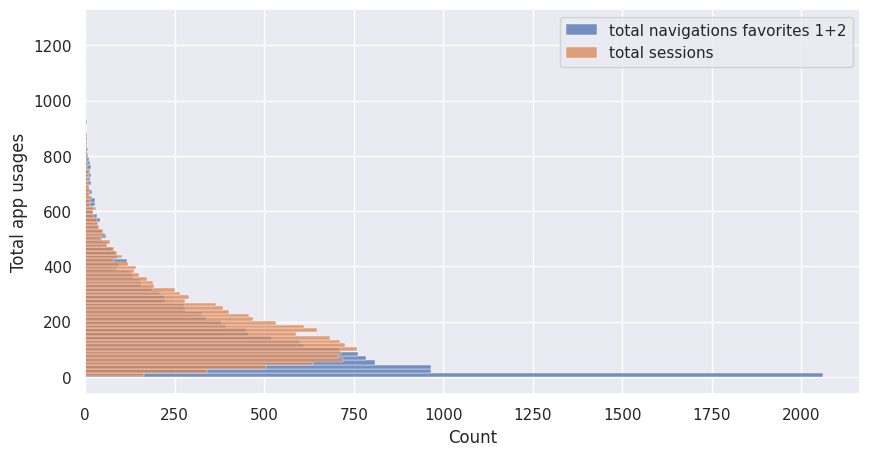

In [507]:
sns.set()
plt.figure(figsize=(10,5))
sns.histplot( y=df['total_navigations_fav1']+df['total_navigations_fav2'], label='total navigations favorites 1+2')
sns.histplot( y=df['total_sessions'], label='total sessions')
#plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total app usages')
plt.legend(loc='best')
plt.show()


Observation:

Navigation: a session where a drive happened.

Session: how is it defined? I imagine sessions include app usages which lead to a drive and usages that did not lead to a drive.

total_sessions is described in data dictionary as "a model estimate of the total number of sessions since a user has onboarded"

If so, total sessions should always be greater than or equal to the total number of navigations to no matter the destination. In the histogram above we see that for some users with low usage of the app this is not met.

## Calculation of new features from original ones:

In [508]:
# km_per_driving_day:
temp_series = df['driven_km_drives']/df['driving_days']
temp_series[np.isinf(temp_series)] = 0
df.insert(12, 'km_per_driving_day', temp_series )

# percent_sessions_last_month:
temp_series = df['sessions']/df['total_sessions']*100
df.insert(13, 'percent_sessions_last_month', temp_series )

# total_sessions_per_day:
temp_series = df['total_sessions']/df['n_days_after_onboarding']
temp_series[np.isinf(temp_series)] = 0
df.insert(14, 'total_sessions_per_day', temp_series )

# km_per_hour:
temp_series = df['driven_km_drives']/df['duration_minutes_drives']*60
temp_series[np.isinf(temp_series)] = 0
df.insert(15, 'km_per_hour', temp_series )

# km_per_drive:
temp_series = df['driven_km_drives']/df['drives']
temp_series[np.isinf(temp_series)] = 0
df.insert(16, 'km_per_drive', temp_series )

# percent_sessions_to_favorite:
# percentage of total sessions that were used to navigate to one of the users' favorite places.
# This is a proxy representation for the
# percent of overall drives that are to a favorite place. Since total drives since onboarding
# are not contained in this dataset, total sessions must serve as a reasonable approximation.
# People whose drives to non-favorite places make up a higher percentage of their total drives
# might be less likely to churn, since they're making more drives to less familiar places.

temp_series = (df['total_navigations_fav1']+df['total_navigations_fav2'])/df['total_sessions']*100
df.insert(17, 'percent_sessions_to_favorites', temp_series )



### Check descriptive statistics of new features

In [509]:
df.describe()[['km_per_driving_day', 'percent_sessions_last_month', 'total_sessions_per_day', 'km_per_hour', 'km_per_drive',
              'percent_sessions_to_favorites']]

,km_per_driving_day,percent_sessions_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_sessions_to_favorites
count,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000
mean,582.002438,44.979255,0.338255,190.744107,232.109414,158.090351
std,1038.314705,28.671590,1.319901,339.948098,615.877853,387.761788
min,0.000000,0.000000,0.000383,72.013095,0.000000,0.000000
25%,136.164991,19.692376,0.050865,90.639950,32.488158,20.606304
50%,273.555889,42.431025,0.100477,122.114927,72.947059,65.301506
75%,558.097377,68.722278,0.215264,193.243422,179.329377,164.277849
max,15420.234110,105.603627,39.763874,23642.920871,15777.426560,12186.806175


### Filter data based on new engineered features

In [510]:
# Discard data points where df['total_navigations_fav1']+df['total_navigations_fav2'] is greater than total_sessions:

mask_incoherent_data = False # too many data points are lost!!!
if mask_incoherent_data == True:
    temp_mask = df['percent_sessions_to_favorites'] <= 150 # use a less harder criterion than 100%
    #temp_mask = df['percent_sessions_to_favorites'] <= 100
    df_original_len = len(df) 
    df = df[temp_mask]
    dfb_len_diff = df_original_len - len(df)
    print ('{} rows weremoved by masking incoherent data\n'.format(df_len_diff))

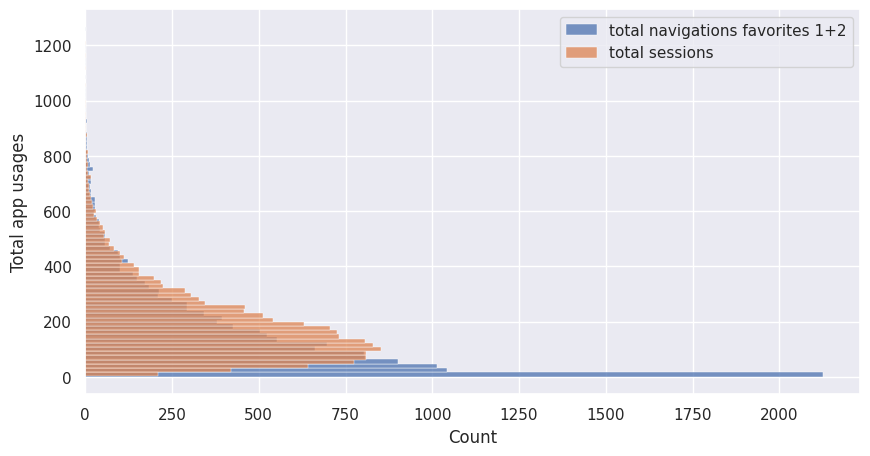

In [511]:
sns.set()
plt.figure(figsize=(10,5))
sns.histplot(bins=80, y=df['total_navigations_fav1']+df['total_navigations_fav2'], label='total navigations favorites 1+2')
sns.histplot(bins=80, y=df['total_sessions'], label='total sessions')
#plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Total app usages')
plt.legend(loc='best')
plt.show()

In [512]:
df.describe()[['km_per_driving_day', 'percent_sessions_last_month', 'total_sessions_per_day', 'km_per_hour', 'km_per_drive',
              'percent_sessions_to_favorites']]

,km_per_driving_day,percent_sessions_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_sessions_to_favorites
count,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000,14297.000000
mean,582.002438,44.979255,0.338255,190.744107,232.109414,158.090351
std,1038.314705,28.671590,1.319901,339.948098,615.877853,387.761788
min,0.000000,0.000000,0.000383,72.013095,0.000000,0.000000
25%,136.164991,19.692376,0.050865,90.639950,32.488158,20.606304
50%,273.555889,42.431025,0.100477,122.114927,72.947059,65.301506
75%,558.097377,68.722278,0.215264,193.243422,179.329377,164.277849
max,15420.234110,105.603627,39.763874,23642.920871,15777.426560,12186.806175


In [513]:
df['percent_sessions_to_favorites'].sort_values(ascending=False).head(20)

4362     12186.806175
4868     11349.703590
11761     8784.944579
2181      8529.347333
12925     8430.356422
13270     8294.555721
4761      7811.677038
1181      7517.842024
10823     6556.891899
6048      6237.911778
5054      5972.910158
12340     5562.011748
11964     5208.070987
9777      5192.179435
6208      5098.918575
14605     5021.349761
8459      5019.132616
3857      4872.585866
11227     4858.826715
1461      4763.069686
Name: percent_sessions_to_favorites, dtype: float64

### Feature **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [514]:
temp_mask = (df['drives'] >= 60) & (df['driving_days'] >= 15)
temp_list = np.where(temp_mask, 1, 0)
df.insert(18, 'pro_driver', temp_list)
df.head()thres

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_sessions_to_favorites,pro_driver
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,95.367025,0.130381,79.430298,11.632058,70.093079,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,40.685648,0.266854,260.389902,128.186173,25.390292,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,84.118609,0.051121,113.953460,32.201567,0.000000,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.496767,4.505948,93.351141,22.839778,486.764004,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,49.926590,0.107713,194.342970,58.091206,101.636273,1


### **Check for missing values again**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [515]:
print(df.isna().sum())

label                            0
sessions                         0
drives                           0
total_sessions                   0
n_days_after_onboarding          0
total_navigations_fav1           0
total_navigations_fav2           0
driven_km_drives                 0
duration_minutes_drives          0
activity_days                    0
driving_days                     0
device                           0
km_per_driving_day               0
percent_sessions_last_month      0
total_sessions_per_day           0
km_per_hour                      0
km_per_drive                     0
percent_sessions_to_favorites    0
pro_driver                       0
dtype: int64


# **Task 4. Check for Outliers**
Altough tree-based models are resilient to outliers, some of them may refelct erroneous data.

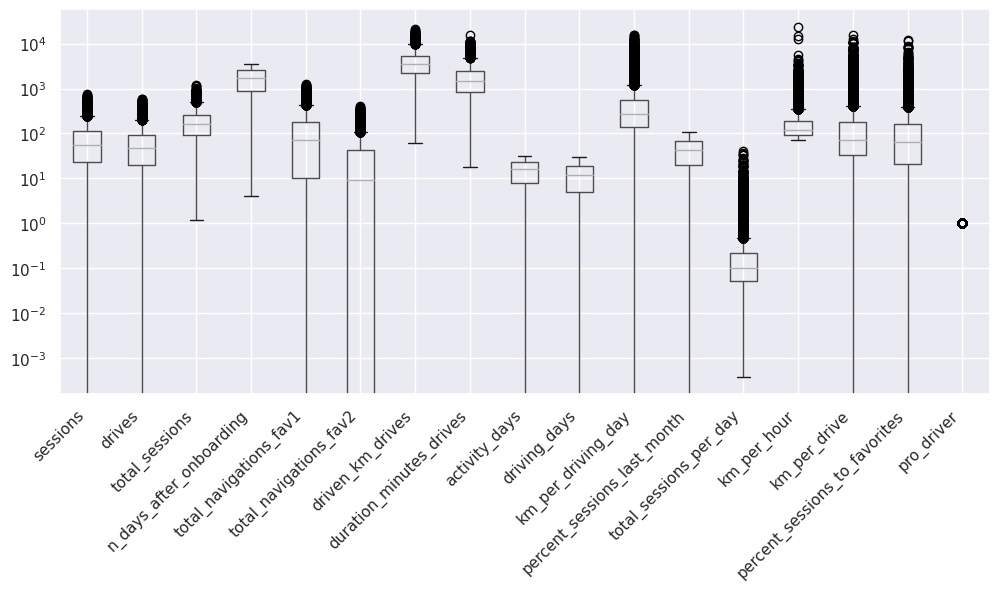

In [516]:
def df_boxplot(df):
    '''df is the input dataframe for plotting'''
    sns.set()
    df.boxplot(figsize=(12,5))
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.yscale('log')
    plt.show()
    
df_boxplot(df)


In [517]:
# Discard data points with unrealistic outliers:
mask_incoherent_data2 = True
if mask_incoherent_data2 == True:
    temp_mask = (df['km_per_drive'] < 2000) & (df['km_per_hour'] < 200) & (df['km_per_driving_day'] < 2200)
    df_original_len = len(df) 
    df = df[temp_mask]
    df_len_diff = df_original_len - len(df)
    print ('{} rows weremoved by masking unrealistic data\n'.format(df_len_diff))

2 rows weremoved by masking unrealistic data



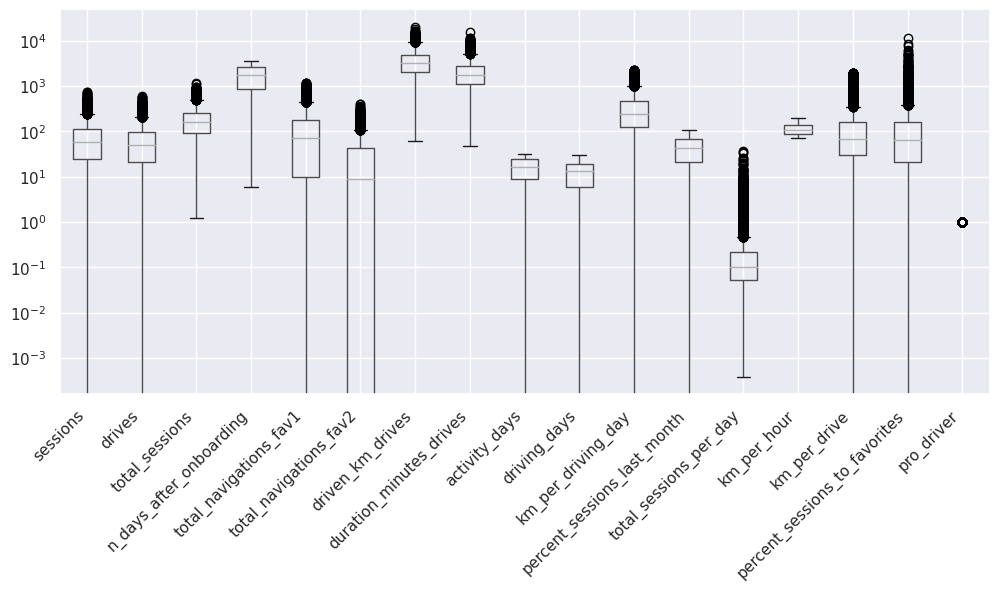

In [518]:
df_boxplot(df)

In [519]:
df.describe()[['km_per_driving_day', 'percent_sessions_last_month', 'total_sessions_per_day', 'km_per_hour', 'km_per_drive',
              'percent_sessions_to_favorites']]

,km_per_driving_day,percent_sessions_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_sessions_to_favorites
count,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000
mean,374.925180,45.578955,0.338674,113.707276,158.962416,150.344473
std,399.470414,28.414949,1.273863,33.856773,263.959586,338.925768
min,0.000000,0.000000,0.000383,72.013095,0.000000,0.000000
25%,123.081966,20.775262,0.052084,85.298220,29.484711,20.577163
50%,242.134183,43.198704,0.102127,104.728550,66.091430,64.058089
75%,468.936652,69.096074,0.219796,135.842873,157.767904,162.372972
max,2199.966476,105.603627,36.214238,199.996738,1966.263323,11349.703590


# **Task 5. Variable Encoding**

In [520]:
def column_encode(df, column, map_dictionary):
    '''Inserts a new column after the given one
    transformed to the values given in dictionary'''

    new_column = df[column].map(map_dictionary)
    new_colum_name = column +'_encoded'
    df.insert(df.columns.get_loc(column)+1, column=new_colum_name, value=new_column)

    # Check proportions are kept:
    a = df[column].value_counts(normalize=True).values.all()
    b = df[new_colum_name].value_counts(normalize=True).values.all()
    if a == b:
        print('Column transform success with {} and proportions\n {}\n'.format(map_dictionary, df[column].value_counts(normalize=True)))
    else:
        print('Column transform failure with {}\n {}\n and {}\n'.format(map_dictionary, a, b))

In [521]:
column_encode(df, 'device', {'Android':1, 'iPhone':2})
column_encode(df, 'label', {'retained':0, 'churned':1})

Column transform success with {'Android': 1, 'iPhone': 2} and proportions
 device
iPhone     0.643227
Android    0.356773
Name: proportion, dtype: float64

Column transform success with {'retained': 0, 'churned': 1} and proportions
 label
retained    0.827775
churned     0.172225
Name: proportion, dtype: float64



### **Evaluation Metric and Class Balance**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [522]:
df['label'].value_counts(normalize=True)

label
retained    0.827775
churned     0.172225
Name: proportion, dtype: float64

Approximately 17% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

# **Modeling Workflow and Model Selection**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

# **Task 6. Split the Data**
Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [523]:
pd.DataFrame(df.columns)

,0
0,label
1,label_encoded
2,sessions
3,drives
4,total_sessions
5,n_days_after_onboarding
6,total_navigations_fav1
7,total_navigations_fav2
8,driven_km_drives
9,duration_minutes_drives


In [524]:
X_features = set(df.columns) -set(['label', 'label_encoded', 'device'])
X_features = list(X_features)
X_features

['sessions',
 'km_per_hour',
 'device_encoded',
 'percent_sessions_last_month',
 'activity_days',
 'n_days_after_onboarding',
 'total_navigations_fav1',
 'pro_driver',
 'total_navigations_fav2',
 'km_per_drive',
 'drives',
 'driving_days',
 'km_per_driving_day',
 'percent_sessions_to_favorites',
 'driven_km_drives',
 'duration_minutes_drives',
 'total_sessions_per_day',
 'total_sessions']

In [525]:
def splitset_train_validation_test(Xin, yin,
                                   validation_size: float = 0.20,
                                   test_size: float = 0.20,
                                   random_state: float = 44):
    '''Splitting with stratification  on y
    The X and y for the model are returned as dictionaries
    with 'train', 'valid' and 'test' as keys
    Input set divided into train0 and test sets according to test_size
    train0 set divided into train and validation according to validation_size
    Set sizes are relative to original set size'''
    
    X=dict()
    y=dict()
    X_train0, X['test'], y_train0, y['test'] = train_test_split(Xin, yin, 
                                                                      test_size=test_size,
                                                                      stratify=yin,
                                                                      random_state=random_state)
    # Calculate factor for validation set from user input:
    b = validation_size / (1 - test_size)
    X['train'], X['valid'], y['train'], y['valid'] = train_test_split(X_train0, y_train0, 
                                                                      test_size = b,
                                                                      stratify = y_train0,
                                                                      random_state=random_state) 
    # check spliting ratios:
    for set in ['train', 'valid', 'test']:
        set_ratio = len(y[set]) / len(yin)
        print('{} set size: {} of original data set'.format(set, set_ratio))
        print('Value distribution in y vector: \n {}\n'.format(y[set].value_counts(normalize=True)))
    return X,y
    print('exiting split')

In [526]:
X, y = splitset_train_validation_test(df[X_features], df['label_encoded'], test_size=0.2, validation_size=0.2, )

train set size: 0.6 of original data set
Value distribution in y vector: 
 label_encoded
0    0.82771
1    0.17229
Name: proportion, dtype: float64

valid set size: 0.2 of original data set
Value distribution in y vector: 
 label_encoded
0    0.827873
1    0.172127
Name: proportion, dtype: float64

test set size: 0.2 of original data set
Value distribution in y vector: 
 label_encoded
0    0.827873
1    0.172127
Name: proportion, dtype: float64



# **Task 7. Modeling**

## **Random forest**

In [527]:
print(len(y['train']))
print(len(X['train'].columns))

6135
18


In [528]:
# Define hyperparameter values for tuning and instantiate model:

# The random forest takes parameters for decision trees and for random forests:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

rf_params = {#Tree parameters:
             'max_depth': [36, 72 ], # None puts no limit in depth. We have 18 features, so limit at nfeats*4
             'min_samples_leaf': [1,2,4], # ~6000 items in train set
             #'min_samples_split': [2,3,4],
    
             # Random forest parameters:
             'bootstrap': [True],
             'max_samples': [0.8, 0.9], # fraction of original data set to be used for bootstraping
             'n_estimators': [50, 100], # number of decision trees
             'max_features': [0.33, 0.66, 0.9], # number of fetures used in decision trees           
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

random_forest = dict()
model_instance = RandomForestClassifier(random_state=54)
random_forest['model'] = GridSearchCV(model_instance, rf_params, scoring = scoring, cv=5, refit="f1")
random_forest['model_name'] = 'RandomForestClassifier'

Now fit the model to the training data.

In [529]:
%%time
random_forest['model'].fit(X['train'], y['train']) 

CPU times: user 14min 33s, sys: 104 ms, total: 14min 33s
Wall time: 14min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=54),
             param_grid={'bootstrap': [True], 'max_depth': [36, 72],
                         'max_features': [0.33, 0.66, 0.9],
                         'max_samples': [0.8, 0.9],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Examine the best average score across all the validation folds.

In [534]:
def check_fit_results(model_dict):
    '''model_dict name of the dictionary where the model is.
    Thes model should be under the key ['model'] of model_dict_name'''

    print('Best score: {}\n'.format(model_dict['model'].best_score_))
    print('Best estimator: {}\n'.format(model_dict['model'].best_estimator_))
    print('Best parameters: {}\n'.format(model_dict['model'].best_params_))

    # store results separately:
    model_dict['cv_results'] = pd.DataFrame(model_dict['model'].cv_results_)
    
    # print selected parameters only for best 5 cv-models:
    print('5-top CV-models:\n {}\n'.format(model_dict['cv_results'][['params',
                              'mean_test_f1', 'std_test_f1',
                              'mean_test_accuracy', 'std_test_accuracy',
                              'mean_test_precision', 'std_test_precision',
                              'mean_test_recall', 'std_test_recall']].sort_values(by='mean_test_f1', ascending=False).head(5)))
    
    # print all parameters for best 2 cv-models:
    print('2-top CV-models:\n {}\n'.format(model_dict['cv_results'].sort_values(by='mean_test_f1', ascending=False).head(2)))

    

Examine the best combination of hyperparameters.

In [535]:
check_fit_results(random_forest)

Best score: 0.20164593565342775

Best estimator: RandomForestClassifier(max_depth=36, max_features=0.9, max_samples=0.9,
                       n_estimators=50, random_state=54)

Best parameters: {'bootstrap': True, 'max_depth': 36, 'max_features': 0.9, 'max_samples': 0.9, 'min_samples_leaf': 1, 'n_estimators': 50}

5-top CV-models:
                                                params  mean_test_f1  \
66  {'bootstrap': True, 'max_depth': 72, 'max_feat...      0.201646   
30  {'bootstrap': True, 'max_depth': 36, 'max_feat...      0.201646   
26  {'bootstrap': True, 'max_depth': 36, 'max_feat...      0.197783   
62  {'bootstrap': True, 'max_depth': 72, 'max_feat...      0.197783   
27  {'bootstrap': True, 'max_depth': 36, 'max_feat...      0.195413   

    std_test_f1  mean_test_accuracy  std_test_accuracy  mean_test_precision  \
66     0.012009            0.824450           0.005421             0.471218   
30     0.012009            0.824450           0.005421             0.471218   


In [649]:
def table_model_scores(model_name:str, model_object, model_metrics, order_metric:str):
    '''
    Generate table of test scores for GridSearchCV model
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        order_metric (string): precision, recall, f1, or accuracy. For presenting order

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Check metrics to extract are included in expected scores:
    expected_metrics = set(['accuracy', 'precision', 'recall', 'f1'])
    model_metrics = set(scoring)
    if expected_metrics != model_metrics:
        print('Error: Metrics unmatch:\n expected {}, got {}\n'.format(expected_metrics, model_metrics))
        return 1
    else:
         print('Metrics match, metrics to extract are:\n expected {}\n'.format(expected_metrics, model_metrics))
        

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[order_metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    df_table = pd.DataFrame(
                         {'model': [model_name],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],                          
                          },
                         )

    return df_table


In [642]:
models_scores = table_model_scores(random_forest['model_name']+'_CV', random_forest['model'], scoring, 'f1')
models_scores

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}



,model,f1,accuracy,precision,recall
0,RandomForestClassifier_CV,0.201646,0.82445,0.471218,0.128682


### Predict on validation and test sets:

In [637]:
random_forest['y_predict_valid'] = random_forest['model'].best_estimator_.predict(X['valid'])
random_forest['y_predict_test'] = random_forest['model'].best_estimator_.predict(X['test'])

In [638]:
def prediction_scores(model_name:str, y_prediction, y_reference, model_metrics):
    '''
    Generate a table of test scores for predictions

    In:
        model_name (string): Your choice: how the model will be named in the output table
        y_prediction: numpy array of predictions
        y_reference: numpy array of expected values
        model_metrics: same metrics used when modeling

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''

    # Check metrics to extract are included in expected scores:
    expected_metrics = set(['accuracy', 'precision', 'recall', 'f1'])
    model_metrics = set(model_metrics)
    if expected_metrics != model_metrics:
        print('Error: Metrics unmatch:\n expected {}, got {}\n'.format(expected_metrics, model_metrics))
        return 1
    else:
         print('Metrics match, metrics to extract are:\n expected {}\n'.format(expected_metrics, model_metrics))
         # order metrics for output same as in table_model_scores():
         model_metrics = ('f1', 'accuracy', 'precision', 'recall')
    

    pred_scores_table = list()
    for score in model_metrics:
        score = score+'_score'
        score_value = globals()[score](y_reference, y_prediction)
        # line above a bit tricky, see:
        # https://stackoverflow.com/questions/4018953/whats-the-way-to-call-a-function-dynamically-in-python
        #print(score_value)
        pred_scores_table.append(score_value)
        
    #print(pred_scores_table)
    #return
    pred_scores_table = [model_name] + pred_scores_table
    #print(pred_scores_table)
    columns = ['model'] + list(model_metrics)
    #print(columns)
    #return
    pred_scores_table = dict(zip(columns, pred_scores_table))
    pred_scores_table = pd.DataFrame(pred_scores_table, index=[0])
    return pred_scores_table

In [639]:
random_forest['y_predict_valid_scores'] = prediction_scores(random_forest['model_name']+'_pred_valid',
                                                            random_forest['y_predict_valid'],
                                                            y['valid'],
                                                            scoring)

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}



In [640]:
random_forest['y_predict_test_scores'] = prediction_scores(random_forest['model_name']+'_pred_test',
                                                            random_forest['y_predict_test'],
                                                            y['test'],
                                                            scoring)

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}



In [633]:
random_forest['y_predict_valid_scores']

,model,f1,accuracy,precision,recall
0,RandomForestClassifier_pred_valid,0.223176,0.822983,0.45614,0.147727


In [643]:
# Append scores to table of all model scores:
models_scores = pd.concat([models_scores, random_forest['y_predict_valid_scores']], axis=0)
models_scores = pd.concat([models_scores, random_forest['y_predict_test_scores']], axis=0)
models_scores

,model,f1,accuracy,precision,recall
0,RandomForestClassifier_CV,0.201646,0.824450,0.471218,0.128682
0,RandomForestClassifier_pred_valid,0.223176,0.822983,0.456140,0.147727
0,RandomForestClassifier_pred_test,0.195991,0.823472,0.453608,0.125000


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

## **XGBoost**

In [644]:
# Define xgb to be your XGBClassifier.

model_instance = XGBClassifier(objective='binary:logistic', random_state=54)

# number of features = 18
# number of observations train set = ~6e3
gboost_params = {# tree parameters:
             'max_depth': [36, 72], 
             'min_child_weight': [1,2,4],
             # ensemble parameters:
             'n_estimators': [50, 100],
             'learning_rate': [0.1, 0.3, 0.5],
             'subsample': [0.8, 0.9], # FRACTION of original data set to be used for bootstraping (sampling)
             'colsample_bytree': [0.33, 0.66, 0.9]  # FRACTION of features used in decision trees 
             }    

#scoring = ['accuracy', 'precision', 'recall', 'f1']

grad_boost = dict()
grad_boost['model'] = GridSearchCV(model_instance, gboost_params, scoring=scoring, cv=5, refit='f1')
grad_boost['model_name'] = 'XGBClassifier'

Now fit the model to the `X_train` and `y_train` data.



In [645]:
%%time
grad_boost['model'].fit(X['train'], y['train']) 
grad_boost['y_predict_valid'] = grad_boost['model'].best_estimator_.predict(X['valid'])
grad_boost['y_predict_test'] = grad_boost['model'].best_estimator_.predict(X['test'])

CPU times: user 16min 37s, sys: 6.68 s, total: 16min 44s
Wall time: 4min 31s


Get the best score from this model.

In [646]:
check_fit_results(grad_boost)

Best score: 0.2705151331449148

Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.66, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=54, ...)

Best parameters: {'colsample_bytree': 0.66, 'learning_rate': 0.5, 'max_depth': 36, 'min_child_weight': 4, 'n_estimators': 50, 'subsample': 0.8}

5-top CV-models:
                                         

In [651]:
temp_scores = table_model_scores(grad_boost['model_name']+'_CV', grad_boost['model'], scoring, 'f1')
models_scores = pd.concat([models_scores, temp_scores], axis=0)

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}



In [652]:
models_scores

,model,f1,accuracy,precision,recall
0,RandomForestClassifier_CV,0.201646,0.824450,0.471218,0.128682
0,RandomForestClassifier_pred_valid,0.223176,0.822983,0.456140,0.147727
0,RandomForestClassifier_pred_test,0.195991,0.823472,0.453608,0.125000
0,XGBClassifier_CV,0.270515,0.804075,0.378215,0.210968


### Predict on validation and test sets:

In [653]:
grad_boost['y_predict_valid_scores'] = prediction_scores(grad_boost['model_name']+'_pred_valid',
                                                            grad_boost['y_predict_valid'],
                                                            y['valid'],
                                                            scoring)

grad_boost['y_predict_test_scores'] = prediction_scores(grad_boost['model_name']+'_pred_test',
                                                            grad_boost['y_predict_test'],
                                                            y['test'],
                                                            scoring)
# Append scores to table of all model scores:
models_scores = pd.concat([models_scores, grad_boost['y_predict_valid_scores']], axis=0)
models_scores = pd.concat([models_scores, grad_boost['y_predict_test_scores']], axis=0)
models_scores

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}



,model,f1,accuracy,precision,recall
0,RandomForestClassifier_CV,0.201646,0.824450,0.471218,0.128682
0,RandomForestClassifier_pred_valid,0.223176,0.822983,0.456140,0.147727
0,RandomForestClassifier_pred_test,0.195991,0.823472,0.453608,0.125000
0,XGBClassifier_CV,0.270515,0.804075,0.378215,0.210968
0,XGBClassifier_pred_valid,0.218519,0.793643,0.313830,0.167614
0,XGBClassifier_pred_test,0.225191,0.801467,0.343023,0.167614


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

# **Task 8. Model Evaluation**

## **Confusion Matrix**
For best model on test set

In [655]:
grad_boost.keys()

dict_keys(['model', 'model_name', 'y_predict_valid', 'y_predict_test', 'cv_results', 'y_predict_valid_scores', 'y_predict_test_scores'])

In [657]:
# Confusion matrix:
grad_boost['cm_pred_test'] = metrics.confusion_matrix(y['test'], grad_boost['y_predict_test'],
                                                      labels=grad_boost['model'].best_estimator_.classes_)
print(grad_boost['cm_pred_test'])

[[1580  113]
 [ 293   59]]


In [659]:
grad_boost['model'].best_estimator_.classes_

array([0, 1])

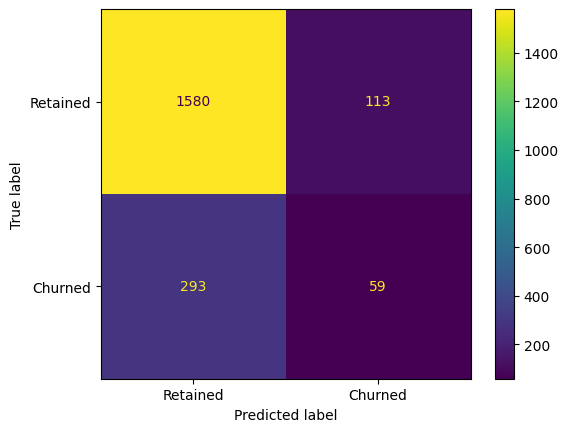

In [661]:
import matplotlib
matplotlib.rc_file_defaults()
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=grad_boost['cm_pred_test'], display_labels=['Retained', 'Churned'])
disp.plot()

In [662]:
temp_mask = models_scores['model'] == 'XGBClassifier_pred_test'
models_scores[temp_mask]

,model,f1,accuracy,precision,recall
0,XGBClassifier_pred_test,0.225191,0.801467,0.343023,0.167614


### observations

The model predicted nearly three times as many FNs than it did FPs.

In this use case FNs are less acceptable than FPs.

The model correctly identified only 17% of the users who actually churned.

The model is not good for its purpose.

## **Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

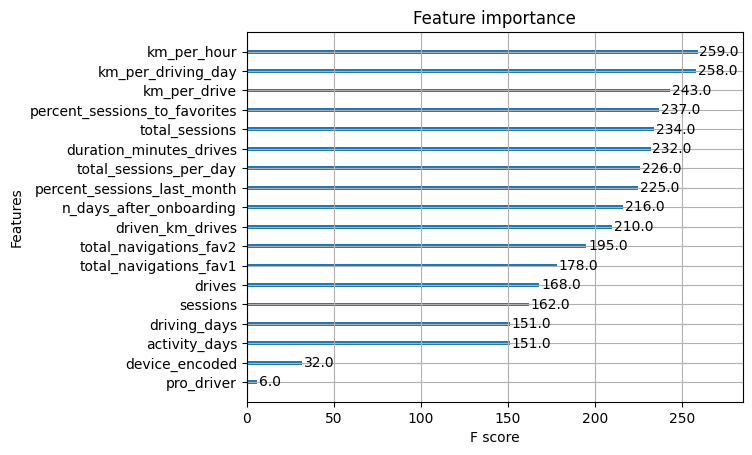

In [663]:
plot_importance(grad_boost['model'].best_estimator_)

### Get feature relative importances and compare to F-Score:

In [710]:
# calculate feature importances. Returns a 1-dim array with importances
random_forest['feat_importances_best'] = random_forest['model'].best_estimator_.feature_importances_ 
grad_boost['feat_importances_best'] = grad_boost['model'].best_estimator_.feature_importances_



In [740]:
def table_feat_importance(model_dict_name):
    index = list(model_dict_name['model'].best_estimator_.feature_names_in_)
    #print(index)
    table_df = pd.DataFrame(data=model_dict_name['model'].best_estimator_.feature_importances_,
                            index=index,
                            columns=['feature_importance'])
    #print(table_df)
    return table_df

In [741]:
random_forest['feat_importances_best'] = table_feat_importance(random_forest)
grad_boost['feat_importances_best'] = table_feat_importance(grad_boost)
# Sort reference model:
grad_boost['feat_importances_best'] = grad_boost['feat_importances_best'].sort_values(by='feature_importance',
                                                                                               ascending=False)
# Reindex other model to index of reference:
random_forest['feat_importances_best'] = random_forest['feat_importances_best'].reindex(grad_boost['feat_importances_best'].index)

In [742]:
grad_boost['feat_importances_best'].transpose()

,activity_days,device_encoded,total_sessions_per_day,sessions,total_sessions,total_navigations_fav1,driven_km_drives,percent_sessions_to_favorites,driving_days,duration_minutes_drives,total_navigations_fav2,km_per_hour,km_per_driving_day,km_per_drive,drives,percent_sessions_last_month,n_days_after_onboarding,pro_driver
feature_importance,0.144793,0.060221,0.059447,0.05852,0.05543,0.053708,0.053127,0.052208,0.050963,0.049102,0.048314,0.048229,0.047594,0.047463,0.046941,0.043342,0.040804,0.039795


In [743]:
random_forest['feat_importances_best'].transpose()

,activity_days,device_encoded,total_sessions_per_day,sessions,total_sessions,total_navigations_fav1,driven_km_drives,percent_sessions_to_favorites,driving_days,duration_minutes_drives,total_navigations_fav2,km_per_hour,km_per_driving_day,km_per_drive,drives,percent_sessions_last_month,n_days_after_onboarding,pro_driver
feature_importance,0.102951,0.008994,0.063648,0.037937,0.058449,0.063971,0.058169,0.058695,0.053313,0.058963,0.046936,0.078661,0.060228,0.058842,0.034895,0.062259,0.091716,0.001373


In [738]:
compare_models = dict()
compare_models['feat_importance'] = pd.concat( [random_forest['feat_importances_best'], grad_boost['feat_importances_best']],
                                           axis=1)
compare_models['feat_importance'].columns=['random_forest_feat_importance', 'gradient_boost_feat_importance']
compare_models['feat_importance']

,random_forest_feat_importance,gradient_boost_feat_importance
activity_days,0.102951,0.144793
device_encoded,0.008994,0.060221
total_sessions_per_day,0.063648,0.059447
sessions,0.037937,0.058520
total_sessions,0.058449,0.055430
total_navigations_fav1,0.063971,0.053708
driven_km_drives,0.058169,0.053127
percent_sessions_to_favorites,0.058695,0.052208
driving_days,0.053313,0.050963
duration_minutes_drives,0.058963,0.049102


In [744]:
compare_models['feat_importance']['gradient_boost_feat_importance'].sum()

1.0

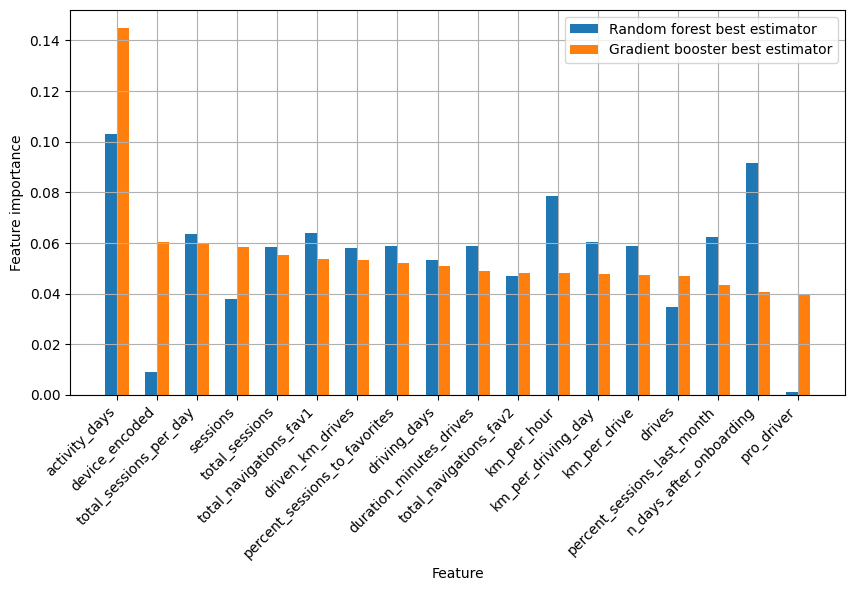

In [739]:
# Numbers of pairs of bars you want
N = len(random_forest['feat_importances_best'])

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, compare_models['feat_importance']['random_forest_feat_importance'], width, label='Random forest best estimator')
plt.bar(ind + width, compare_models['feat_importance']['gradient_boost_feat_importance'], width, label='Gradient booster best estimator')

plt.xlabel('Feature')
plt.ylabel('Feature importance')
#plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, list(grad_boost['feat_importances_best'].index), rotation=45, horizontalalignment='right')


# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.grid(True)

plt.show()

## **Observations**
 plot_importance(model.best_estimator_) shows a "F-score" which does not coincide with the values found
 with model.best_estimator_.feature_importances_ 

 It is not only that the numbers are different but the cardinality is also different!

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

# **Task 9. Further Tuning**
Can the models be improved?

#### **Identify an optimal decision threshold**

The default decision threshold for most implementations of classification algorithms&mdash;including scikit-learn's&mdash;is 0.5. This means that, in the case of the Waze models, if they predicted that a given user had a 50% probability or greater of churning, then that user was assigned a predicted value of `1`&mdash;the user was predicted to churn.

With imbalanced datasets where the response class is a minority, this threshold might not be ideal. You learned that a precision-recall curve can help to visualize the trade-off between your model's precision and recall.

Here's the precision-recall curve for the XGBoost champion model on the test data.

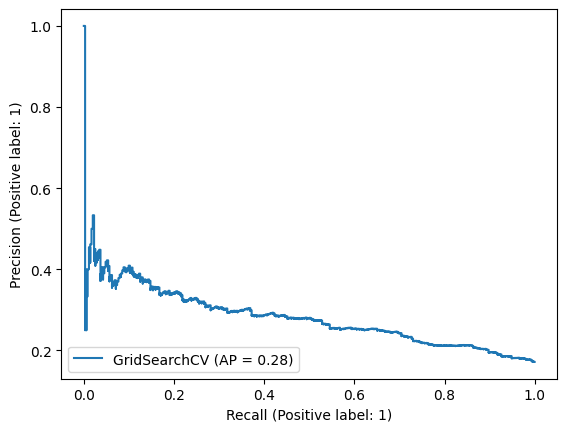

In [751]:
# Plot precision-recall curve
PrecisionRecallDisplay.from_estimator(grad_boost['model'], X['test'],  y['test'])

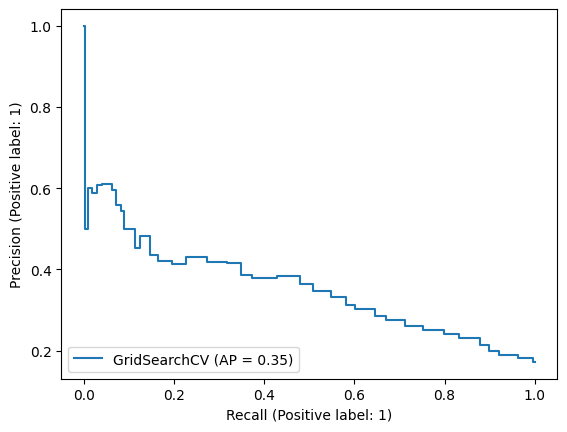

In [752]:
PrecisionRecallDisplay.from_estimator(random_forest['model'], X['test'],  y['test'])

As recall increases, precision decreases. But what if you determined that false positives aren't much of a problem? For example, in the case of this Waze project, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

So, what if instead of using the default 0.5 decision threshold of the model, you used a lower threshold?

Here's an example where the threshold is set to 0.4:

In [754]:
grad_boost.keys()

dict_keys(['model', 'model_name', 'y_predict_valid', 'y_predict_test', 'cv_results', 'y_predict_valid_scores', 'y_predict_test_scores', 'cm_pred_test', 'feat_importances_best'])

In [756]:
# Get predicted probabilities on the test data

grad_boost['proba_test'] = grad_boost['model'].best_estimator_.predict_proba(X['test'])
random_forest['proba_test'] = random_forest['model'].best_estimator_.predict_proba(X['test'])

The `predict_proba()` method returns a 2-D array of probabilities where each row represents a user. The first number in the row is the probability of belonging to the negative class, the second number in the row is the probability of belonging to the positive class. (Notice that the two numbers in each row are complimentary to each other and sum to one.)

You can generate new predictions based on this array of probabilities by changing the decision threshold for what is considered a positive response. For example, the following code converts the predicted probabilities to {0, 1} predictions with a threshold of 0.4. In other words, any users who have a value ≥ 0.4 in the second column will get assigned a prediction of `1`, indicating that they churned.

In [762]:
grad_boost['proba_test'].shape

(2045, 2)

In [763]:
grad_boost['proba_test']


array([[0.8637507 , 0.13624927],
       [0.94901115, 0.05098888],
       [0.99882317, 0.00117683],
       ...,
       [0.9945347 , 0.00546534],
       [0.9982265 , 0.00177346],
       [0.97629106, 0.02370897]], dtype=float32)

In [761]:
grad_boost['proba_test'][:,1]

array([0.13624927, 0.05098888, 0.00117683, ..., 0.00546534, 0.00177346,
       0.02370897], dtype=float32)

In [782]:
# Create an array of new predictions that assigns a 1 to any value >= 0.4

for thres in [0.3, 0.4]:
    
    temp_y_pred = pd.Series(random_forest['proba_test'][:,1]) # isolate probabilty of 1
    temp_y_pred = temp_y_pred.where(cond=temp_y_pred < thres, other=1)
    temp_y_pred = temp_y_pred.round(0).astype(int)
    #print(temp_y_pred)

    random_forest['y_predict_test_scores_'+str(thres)] = prediction_scores(random_forest['model_name']+'_pred_test_'+str(thres),
                                                                           temp_y_pred,
                                                                           y['test'],
                                                                           scoring)
    # Append scores to table of all model scores:
    models_scores = pd.concat([models_scores, random_forest['y_predict_test_scores_'+str(thres)]], axis=0)

    temp_y_pred = pd.Series(grad_boost['proba_test'][:,1]) # isolate probabilty of 1
    temp_y_pred = temp_y_pred.where(cond=temp_y_pred < thres, other=1)
    temp_y_pred = temp_y_pred.round(0).astype(int)
    grad_boost['y_predict_test_scores_'+str(thres)] = prediction_scores(grad_boost['model_name']+'_pred_test_'+str(thres),
                                                                      temp_y_pred,
                                                                      y['test'],
                                                                      scoring)
    # Append scores to table of all model scores:
    models_scores = pd.concat([models_scores, grad_boost['y_predict_test_scores_'+str(thres)]], axis=0)


Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}

Metrics match, metrics to extract are:
 expected {'precision', 'f1', 'recall', 'accuracy'}



In [783]:
models_scores

,model,f1,accuracy,precision,recall
0,RandomForestClassifier_CV,0.201646,0.824450,0.471218,0.128682
0,RandomForestClassifier_pred_valid,0.223176,0.822983,0.456140,0.147727
0,RandomForestClassifier_pred_test,0.195991,0.823472,0.453608,0.125000
0,XGBClassifier_CV,0.270515,0.804075,0.378215,0.210968
0,XGBClassifier_pred_valid,0.218519,0.793643,0.313830,0.167614
0,XGBClassifier_pred_test,0.225191,0.801467,0.343023,0.167614
0,RandomForestClassifier_pred_test_0.3,0.424171,0.762347,0.363821,0.508523
0,XGBClassifier_pred_test_0.3,0.290749,0.763814,0.300912,0.281250
0,RandomForestClassifier_pred_test_0.4,0.361874,0.806846,0.419476,0.318182
0,XGBClassifier_pred_test_0.4,0.261017,0.786797,0.323529,0.218750


In [786]:
# Export models:
joblib.dump(grad_boost['model'], './models/6_waze_grad_boost.pkl')
joblib.dump(random_forest['model'], './models/6_waze_random_forest.pkl')

['./models/6_waze_random_forest.pkl']

Recall and F1 score increased significantly, while precision and accuracy decreased.

So, using the precision-recall curve as a guide, suppose you knew that you'd be satisfied if the model had a recall score of 0.5 and you were willing to accept the \~30% precision score that comes with it. In other words, you'd be happy if the model successfully identified half of the people who will actually churn, even if it means that when the model says someone will churn, it's only correct about 30% of the time.

What threshold will yield this result? There are a number of ways to determine this. Here's one way that uses a function to accomplish this.

# Appendix: Function to Calculate Probability Threshold for Given Recall Value 

In [143]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


**END**